# Lab session 4: Linear and Multilinear Regression
### Name: Makesh Srinivasan
### Registration number: 19BCE1717
### Course code: CSE4020
### Faculty: Dr. Abdul Quadir
### Slot: L31 + L32
### Date: 30-August-2021 Monday

In [35]:
# Import the libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

# Forest fires (Part 1)

In [36]:
# import the dataset
forest_fire = pd.read_csv("forestfires.csv")

# Get generic information on the dataset
print(forest_fire.shape)
print(forest_fire.info())

(517, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


0.0
1090.84


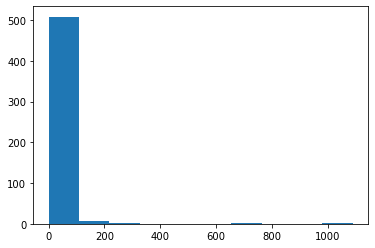

In [37]:
# We want to predict the value of the column "Area"
# before we train a model and make predictions, we will get generic infomrmation about the attribute
print(forest_fire['area'].min())
print(forest_fire['area'].max())
plt.hist(forest_fire['area'])
plt.show()
# the count vs the value of the area is shown below

In [38]:
# Before we can train a linear regression model, we need to make sure the attributes data-types are numerical
# The "month" and "day" features are object-types as shown above. They need to be replaced with numerical values
forest_fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'), (1,2,3,4,5,6,7), inplace=True)
forest_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Observe trend between two features

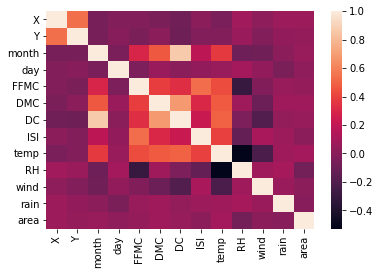

In [39]:
corr = forest_fire.corr()
# plotting a correlation heat map suggests to what extent two attributes are related
# This will help with plotting graphs  such as plot, hist and scatter and observe trends pairwise
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

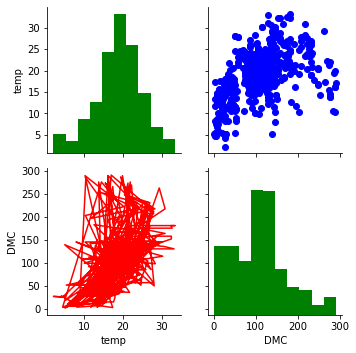

In [40]:
g = sb.PairGrid(data=forest_fire, vars=["temp", "DMC"])
g.map_upper(plt.scatter, color='blue')
g.map_lower(plt.plot, color='red')
g.map_diag(plt.hist, color='green')

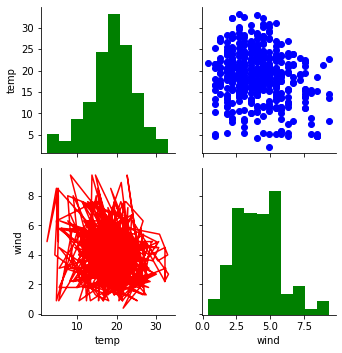

In [41]:
g = sb.PairGrid(data=forest_fire, vars=["temp", "wind"])
g.map_upper(plt.scatter, color='blue')
g.map_lower(plt.plot, color='red')
g.map_diag(plt.hist, color='green')

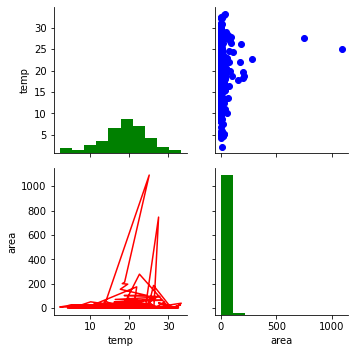

In [42]:
g = sb.PairGrid(data=forest_fire, vars=["temp", "area"])
g.map_upper(plt.scatter, color='blue')
g.map_lower(plt.plot, color='red')
g.map_diag(plt.hist, color='green')

In [43]:
# We can now check if the dataset is clean
# Check for presence of NaN or NA values
print(forest_fire.isnull().sum())
# None of the attributes have NaN values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


### Training a linear regresion model

In [44]:
regression = linear_model.LinearRegression()
df = forest_fire.values
df

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

In [45]:
train_x = (df[:,0:12])
train_y = df[:,12]
print(train_x.shape)
print(train_y.shape)

(517, 12)
(517,)


In [46]:
regression.fit(train_x, train_y)
print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Intercept:  -14.539440967722241


In [47]:
y_predicted = regression.predict(train_x)
for i in range(0, len(train_x)):
    print(train_y[i], y_predicted[i])

0.0 6.9377376381298905
0.0 11.314903031782778
0.0 12.178050899520757
0.0 -6.4177020992696026
0.0 -3.9576444760195315
0.0 26.224756860657266
0.0 25.674894458358366
0.0 -1.2381075055418407
0.0 14.030127472388687
0.0 21.996579880504783
0.0 19.143160771387628
0.0 6.2274965792182275
0.0 13.722903206039787
0.0 16.70371164463726
0.0 28.355686971098613
0.0 19.884845166801995
0.0 12.290925597733372
0.0 16.391611144225024
0.0 9.806593480595703
0.0 8.053224998989284
0.0 15.737818924621328
0.0 6.555837577999318
0.0 -7.7995889626565456
0.0 25.473707593108642
0.0 22.02257208473172
0.0 17.24575175806642
0.0 21.24241315017732
0.0 14.407933198069978
0.0 31.84478842484768
0.0 24.265918552701976
0.0 17.27401662367656
0.0 2.160682443810634
0.0 14.049679471168607
0.0 13.349059691902676
0.0 11.330448307038187
0.0 7.459822528001515
0.0 18.440133497980163
0.0 6.149313351075749
0.0 19.129334094979242
0.0 2.0973736819909146
0.0 19.462347404367122
0.0 14.002829070667607
0.0 -0.45917162284409585
0.0 9.82253458688

### Plotting

Text(0.5, 0, 'area')

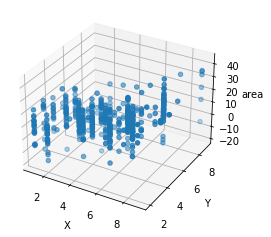

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_x[:,0], train_x[:, 1], y_predicted)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('area')

### Metrics

In [49]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(train_y, y_predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(train_y, y_predicted))

Mean Absolute Error:  19.30993916466936
Mean Squared Error:  3947.2655536056095


In [50]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Root Mean Squared Error:  62.82726759620865


# A new dataset (Part 2)

In [51]:
# Loading the IRIS dataset - it is a dataset on the iris species 
# Dataset acquired from https://www.kaggle.com/vik2012kvs/iris-dataset/tasks?taskId=2513
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
# The last column Species contains object data type. As mentioned above, convert Species entries to numerical
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
# There are 3 unique values in the column Species to be assigned a numberical value - 1, 2, 3
df.Species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3), inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [54]:
# The dataset is now entirely numerical
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB
None


In [55]:
# Clean the dataset
# The dataset is already fully clean as there are no NaN values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Training the dataset

In [56]:
regression = linear_model.LinearRegression()
d = df.values
d

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01, 1.00e+00],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01, 1.00e+00],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01, 1.00e+00],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01, 1.00e+00],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01, 1.00e+00],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01, 1.00e+00],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01, 1.00e+00],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01, 1.00e+00],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01, 1.00e+00],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01, 1.00e+00],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01, 1.00e+00],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01, 1.00e+00],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01, 1.00e+00],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01, 1.00e+00],
       [1.50e+01, 5.80e+00, 4.00e+

In [57]:
train_x = (d[:,0:5])
train_y = d[:,5]
print(train_x.shape)
print(train_y.shape)
# The last column Species is the label

(150, 5)
(150,)


In [58]:
regression.fit(train_x, train_y)
print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [ 0.00735954 -0.0606373  -0.02095417  0.16558388  0.33077127]
Intercept:  0.8438139692499476


In [59]:
y_predicted = regression.predict(train_x)
for i in range(0, len(train_x)):
    print(train_y[i], y_predicted[i])

1.0 0.7665553589981199
1.0 0.7965194408432106
1.0 0.7952572136170649
1.0 0.84389267142241
1.0 0.7999618136052327
1.0 0.8926095939037891
1.0 0.876203764996631
1.0 0.842789642548912
1.0 0.8804502558359435
1.0 0.836781568920639
1.0 0.8343270781226588
1.0 0.9009136318375301
1.0 0.8504609351182413
1.0 0.8384639567240249
1.0 0.7835488865359076
1.0 0.904419898243581
1.0 0.9073309346997591
1.0 0.9247445899534926
1.0 0.9391106576284696
1.0 0.949735796558594
1.0 0.9473254608638738
1.0 0.9996274115798024
1.0 0.8904548222835148
1.0 1.0889220538146733
1.0 1.0462627567366016
1.0 1.0002013394982492
1.0 1.065333458739413
1.0 0.9757574767403399
1.0 0.9686540420791753
1.0 1.0436398362547101
1.0 1.0470310594113736
1.0 1.0613178299190795
1.0 0.9669055238025953
1.0 0.970497191725866
1.0 1.0207699577395204
1.0 1.0033723100271348
1.0 0.9906853323131993
1.0 1.042848564397786
1.0 1.082582517490352
1.0 1.0722310504838237
1.0 1.0835192498490354
1.0 1.146342442454047
1.0 1.107829824987044
1.0 1.2545043988961546
1

## Plotting

Text(0.5, 0, 'area')

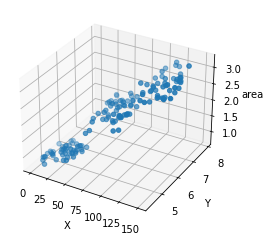

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_x[:,0], train_x[:, 1], y_predicted)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('area')

## Metrics

In [61]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(train_y, y_predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(train_y, y_predicted))

Mean Absolute Error:  0.13544335217293138
Mean Squared Error:  0.02810990572541044


In [62]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Root Mean Squared Error:  0.1676600898407562


# Notepad Code

In [63]:
datafile = pd.DataFrame()
datafile[0] = np.arange(2000,2020)
datafile[1] = [50,54,62,78,65,69,72,77,85,98,75,80,82,85,88,75,90,93,95,98]
datafile1 = pd.DataFrame()
datafile1[0] = np.arange(2000,2020)
datafile1[1] = [50,54,62,65,68,70,71,74,76,80,82,84,86,90,91,93,94,95,98,100]
datafile.columns =["Year","Placement"]
datafile1.columns =["Year","Placement"]
print(datafile)
print(datafile1)

    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         78
4   2004         65
5   2005         69
6   2006         72
7   2007         77
8   2008         85
9   2009         98
10  2010         75
11  2011         80
12  2012         82
13  2013         85
14  2014         88
15  2015         75
16  2016         90
17  2017         93
18  2018         95
19  2019         98
    Year  Placement
0   2000         50
1   2001         54
2   2002         62
3   2003         65
4   2004         68
5   2005         70
6   2006         71
7   2007         74
8   2008         76
9   2009         80
10  2010         82
11  2011         84
12  2012         86
13  2013         90
14  2014         91
15  2015         93
16  2016         94
17  2017         95
18  2018         98
19  2019        100


No handles with labels found to put in legend.


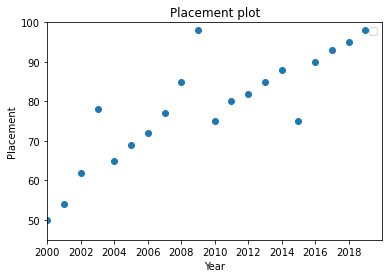

In [64]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[50]
 [54]
 [62]
 [78]
 [65]
 [69]
 [72]
 [77]
 [85]
 [98]
 [75]
 [80]
 [82]
 [85]
 [88]
 [75]
 [90]
 [93]
 [95]
 [98]]
Coefficients:  [[1.94661654]]
Intercept:  [-3833.17593985]


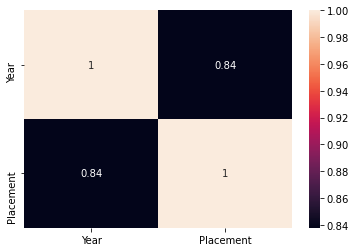

In [65]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['Year']])
train_y = np.asanyarray(datafile[['Placement']])
print(train_x)
print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

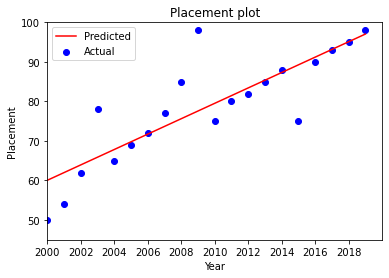

In [66]:
plt.scatter(datafile.Year, datafile.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [67]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

regress1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(datafile1[['Year']])
train_y1 = np.asanyarray(datafile1[['Placement']])
print(train_x)
print(train_y)

regress1.fit (train_x1,train_y1)
# The coefficients
print ('Coefficients: ', regress1.coef_)
print ('Intercept: ',regress1.intercept_)

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[50]
 [54]
 [62]
 [78]
 [65]
 [69]
 [72]
 [77]
 [85]
 [98]
 [75]
 [80]
 [82]
 [85]
 [88]
 [75]
 [90]
 [93]
 [95]
 [98]]
Coefficients:  [[2.44586466]]
Intercept:  [-4835.81503759]


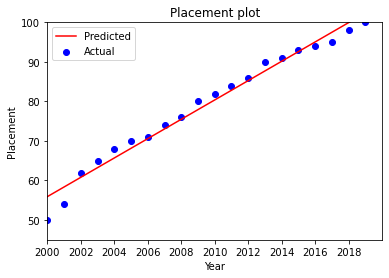

In [68]:
plt.scatter(datafile1.Year, datafile1.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress1.coef_[0][0]*train_x1 + regress1.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

In [69]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['Year']])
train_y = np.asanyarray(datafile[['Placement']])
print(train_x)
print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[50]
 [54]
 [62]
 [78]
 [65]
 [69]
 [72]
 [77]
 [85]
 [98]
 [75]
 [80]
 [82]
 [85]
 [88]
 [75]
 [90]
 [93]
 [95]
 [98]]
Coefficients:  [[1.94661654]]
Intercept:  [-3833.17593985]
[50] [60.05714286]
[54] [62.0037594]
[62] [63.95037594]
[78] [65.89699248]
[65] [67.84360902]
[69] [69.79022556]
[72] [71.73684211]
[77] [73.68345865]
[85] [75.63007519]
[98] [77.57669173]
[75] [79.52330827]
[80] [81.46992481]
[82] [83.41654135]
[85] [85.36315789]
[88] [87.30977444]
[75] [89.25639098]
[90] [91.20300752]
[93] [93.14962406]
[95] [95.0962406]
[98] [97.04285714]
[[60.05714286]
 [62.0037594 ]
 [63.95037594]
 [65.89699248]
 [67.84360902]
 [69.79022556]
 [71.73684211]
 [73.68345865]
 [75.63007519]
 [77.57669173]
 [79.52330827]
 [81.46992481]
 [83.41654135]
 [85.36315789]
 [87.30977444]
 [89.25639098]
 [91.20300752]
 [93.14962406]
 [95.096240

In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 4.712330827067649
Mean Squared Error: 53.55274436090161
Root Mean Squared Error: 7.317974061234544


In [71]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['Year']])
test_y = np.asanyarray(datafile[['Placement']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 4.712330827067649
Mean square error (MSE):  53.55274436090161
R2-score: %.2f (RMSE): 0.7017349483512629


In [72]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['Year']], datafile[['Placement']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))


    Year
11  2011
3   2003
18  2018
16  2016
13  2013
2   2002
9   2009
19  2019
4   2004
12  2012
7   2007
10  2010
14  2014
6   2006
Testing
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
Coefficients:  [[1.70675575]]
Intercept:  [-3349.2809948]
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
    Placement
0          50
17         93
15         75
1          54
8          85
5          69
[[64.23051225]
 [93.24536006]
 [89.83184855]
 [65.937268  ]
 [77.88455828]
 [72.76429102]]
Mean Absolute Error: 8.687453600594003
Mean Squared Error: 104.9748628433119
Root Mean Squared Error: 10.245724124887996
